In [5]:
#import dataset

import pandas as pd

df = pd.read_csv('preprocessed_IMDB_Dataset_Task1.csv')
print(df.head)

<bound method NDFrame.head of                                                   review sentiment
0      one reviewer mentioned watching oz episode you...  positive
1      wonderful little production filming technique ...  positive
2      thought wonderful way spend time hot summer we...  positive
3      basically there family little boy jake think t...  negative
4      petter matteis love time money visually stunni...  positive
...                                                  ...       ...
49995  thought movie right good job wasnt creative or...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  catholic taught parochial elementary school nu...  negative
49998  im going disagree previous comment side maltin...  negative
49999  one expects star trek movie high art fan expec...  negative

[50000 rows x 2 columns]>


In [28]:
# preprocess the dataset

import nltk
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

def preprocess(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"http\S+|@\S+|#\S+|[^a-z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

df['review'] = df['review']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [29]:
# generate file for the preprocessed dataset (just in case)

df.to_csv("preprocessed_IMDB_Dataset_Task1.csv", index=False)

In [8]:
# converts the review column into a TF-IDF matrix X

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['review'])

In [9]:
# converts sentiment labels

df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})
y = df['sentiment']

In [10]:
# splitting dataset for testing and training sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# trains logistic regression classifier on training data

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=100)
clf.fit(X_train, y_train)

# model performance evaluation (logistic regression classifier)

from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))
print("Logistic Regression:", accuracy_score(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Logistic Regression: 0.894


In [13]:
# bonus: model performance evaluation (naive bayes classifier)

from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred, target_names=['negative', 'positive']))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.88      0.87      4961
    positive       0.88      0.85      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Naive Bayes Accuracy: 0.8667


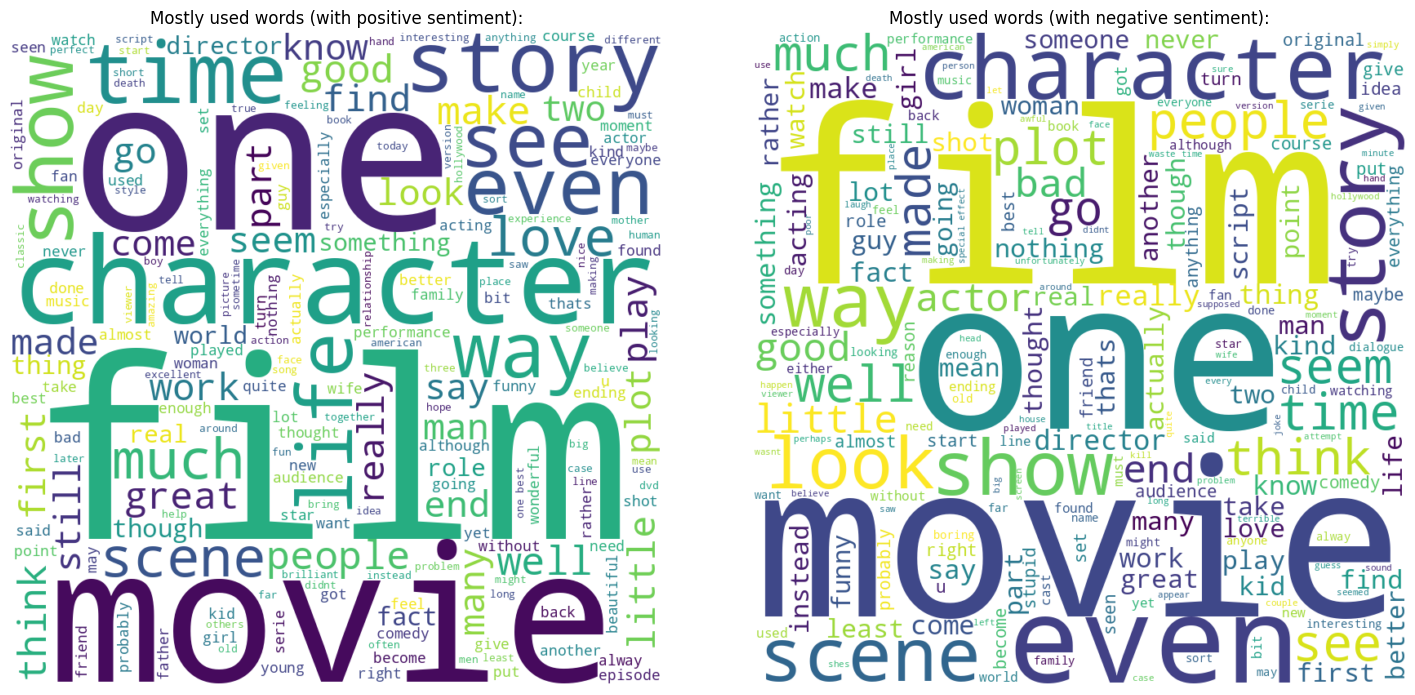

In [14]:
# bonus: visualizing most frequent positive and negative words

from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = ' '.join(df[df['sentiment'] == 1]['review'].dropna().astype(str))
negative_text = ' '.join(df[df['sentiment'] == 0]['review'].dropna().astype(str))

positive_wc = WordCloud(width=800, height=800, background_color='white').generate(positive_text)
negative_wc = WordCloud(width=800, height=800, background_color='white').generate(negative_text)

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Mostly used words (with positive sentiment):')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Mostly used words (with negative sentiment):')
plt.axis('off')

plt.tight_layout()
plt.show()
